In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
data = pd.read_csv('EV-Charger-Prediction-master/data/title_transactions-06-29-2021.csv.gz', compression='gzip', index_col=0)
data.head()

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_date,transaction_type,transaction_year,...,dol_vehicle_id,legislative_district,hb_2042_clean_alternative_fuel_vehicle_cafv_eligibility,meets_2019_hb_2042_electric_range_requirement,meets_2019_hb_2042_sale_date_requirement,meets_2019_hb_2042_sale_price_value_requirement,odometer_reading,odometer_code,transportation_electrification_fee_paid,hybrid_vehicle_electrification_fee_paid
0,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,New,102000.0,2017-01-31T00:00:00.000,Original Title,2017,...,348693390,48.0,TRANSACTION NOT ELIGIBLE: Sale before August 2...,True,False,False,50,Actual Mileage,Not Applicable,Not Applicable
1,Battery Electric Vehicle (BEV),5YJXCBE49H,2017,TESLA,Model X,New,0.0,2017-03-22T00:00:00.000,Original Registration,2017,...,329748177,5.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No
2,Battery Electric Vehicle (BEV),5YJXCBE49H,2017,TESLA,Model X,New,166250.0,2017-03-22T00:00:00.000,Original Title,2017,...,329748177,5.0,TRANSACTION NOT ELIGIBLE: Sale before August 2...,True,False,False,50,Actual Mileage,Not Applicable,Not Applicable
3,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S59H,2017,CHEVROLET,Volt,New,0.0,2017-03-24T00:00:00.000,Original Registration,2017,...,242531271,10.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No
4,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S59H,2017,CHEVROLET,Volt,New,32499.0,2017-03-24T00:00:00.000,Original Title,2017,...,242531271,10.0,TRANSACTION NOT ELIGIBLE: Sale before August 2019,True,False,True,99,Actual Mileage,Not Applicable,Not Applicable


In [3]:
data.to_csv("title_transactions",index=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433172 entries, 0 to 433171
Data columns (total 30 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   electric_vehicle_type                                    433172 non-null  object 
 1   vin_1_10                                                 433172 non-null  object 
 2   model_year                                               433172 non-null  int64  
 3   make                                                     433172 non-null  object 
 4   model                                                    433172 non-null  object 
 5   new_or_used_vehicle                                      433172 non-null  object 
 6   sale_price                                               433172 non-null  float64
 7   transaction_date                                         433172 non-null  object 
 8   transaction_type   

In [4]:
data['date'] = pd.to_datetime(data['transaction_date'])
data['month_year'] = data['date'].dt.strftime('%m/%Y')
data.set_index('date', inplace=True)

In [5]:
drop_columns = ['legislative_district', 'hb_2042_clean_alternative_fuel_vehicle_cafv_eligibility',
                'meets_2019_hb_2042_electric_range_requirement',
                'meets_2019_hb_2042_sale_date_requirement',
                'meets_2019_hb_2042_sale_price_value_requirement',
                'vin_1_10', 'transaction_year', 'date_of_vehicle_sale']
data.drop(columns=drop_columns, inplace=True)

In [6]:
data.drop_duplicates(inplace=True)
data.fillna(method='ffill', inplace=True)
data.head()

C:\Users\krish\AppData\Local\Temp\ipykernel_26748\1016008225.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


,electric_vehicle_type,model_year,make,model,new_or_used_vehicle,sale_price,transaction_date,transaction_type,electric_vehicle_fee_paid,county,...,base_msrp,non_clean_alternative_fuel,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,transportation_electrification_fee_paid,hybrid_vehicle_electrification_fee_paid,month_year
date,,,,,,,,,,,,,,,,,,,,,
2017-01-31,Battery Electric Vehicle (BEV),2016,TESLA,Model X,New,102000.0,2017-01-31T00:00:00.000,Original Title,Not Applicable,King,...,0,CANNOT DETERMINE ELIGIBILITY: Base MSRP has no...,Passenger,WA,348693390,50,Actual Mileage,Not Applicable,Not Applicable,01/2017
2017-03-22,Battery Electric Vehicle (BEV),2017,TESLA,Model X,New,0.0,2017-03-22T00:00:00.000,Original Registration,No,King,...,0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",Passenger,WA,329748177,0,Odometer reading is not collected at time of r...,No,No,03/2017
2017-03-22,Battery Electric Vehicle (BEV),2017,TESLA,Model X,New,166250.0,2017-03-22T00:00:00.000,Original Title,Not Applicable,King,...,0,CANNOT DETERMINE ELIGIBILITY: Base MSRP has no...,Passenger,WA,329748177,50,Actual Mileage,Not Applicable,Not Applicable,03/2017
2017-03-24,Plug-in Hybrid Electric Vehicle (PHEV),2017,CHEVROLET,Volt,New,0.0,2017-03-24T00:00:00.000,Original Registration,No,Island,...,0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",Passenger,WA,242531271,0,Odometer reading is not collected at time of r...,No,No,03/2017
2017-03-24,Plug-in Hybrid Electric Vehicle (PHEV),2017,CHEVROLET,Volt,New,32499.0,2017-03-24T00:00:00.000,Original Title,Not Applicable,Island,...,0,CANNOT DETERMINE ELIGIBILITY: Base MSRP has no...,Passenger,WA,242531271,99,Actual Mileage,Not Applicable,Not Applicable,03/2017


In [7]:
data['model'] = data['model'].str.upper().str.strip()

top_regions = data['county'].value_counts().head(10).index
filtered_data = data[data['county'].isin(top_regions)]

monthly_data = filtered_data.resample('M').size().reset_index(name='vehicle_sales')
monthly_data['month'] = monthly_data['date'].dt.month
monthly_data['year'] = monthly_data['date'].dt.year

C:\Users\krish\AppData\Local\Temp\ipykernel_26748\744834748.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = filtered_data.resample('M').size().reset_index(name='vehicle_sales')


In [8]:
train_subset = monthly_data[monthly_data['year'] < 2021]
X_train, y_train = train_subset[['month', 'year']], train_subset['vehicle_sales']

future_periods = pd.date_range(start='2021-01-01', end='2026-12-01', freq='M')
future_features = pd.DataFrame({'month': future_periods.month, 'year': future_periods.year})

C:\Users\krish\AppData\Local\Temp\ipykernel_26748\309837993.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_periods = pd.date_range(start='2021-01-01', end='2026-12-01', freq='M')


In [9]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
lr_predictions = linear_regressor.predict(future_features)

In [10]:
arima_model = ARIMA(y_train, order=(5, 1, 0))
arima_fit = arima_model.fit()
arima_predictions = arima_fit.forecast(steps=len(future_periods))

In [11]:
forecast_results = pd.DataFrame({
    'Date': future_periods,
    'Linear_Regression_Predictions': lr_predictions,
    'ARIMA_Predictions': arima_predictions
})

In [12]:
synthetic_data = forecast_results[(forecast_results['Date'].dt.year >= 2021) & (forecast_results['Date'].dt.year <= 2024)]
synthetic_data.to_csv('synthetic_dataset_2021-24.csv', index=False)

In [13]:
predictions_2025 = forecast_results[forecast_results['Date'].dt.year == 2025]
print("\nPredictions for 2025:")
predictions_2025


Predictions for 2025:


,Date,Linear_Regression_Predictions,ARIMA_Predictions
180,2025-01-31,9541.267483,8576.635860
181,2025-02-28,9626.441990,8576.636268
182,2025-03-31,9711.616497,8576.635787
183,2025-04-30,9796.791004,8576.636012
184,2025-05-31,9881.965512,8576.636074
185,2025-06-30,9967.140019,8576.635885
186,2025-07-31,10052.314526,8576.636030
187,2025-08-31,10137.489034,8576.636000
188,2025-09-30,10222.663541,8576.635945
189,2025-10-31,10307.838048,8576.636015


In [14]:
predictions_2026 = forecast_results[forecast_results['Date'].dt.year == 2026]
print("\nPredictions for 2026:")
predictions_2026


Predictions for 2026:


,Date,Linear_Regression_Predictions,ARIMA_Predictions
192,2026-01-31,10273.366725,8576.636000
193,2026-02-28,10358.541232,8576.635978
194,2026-03-31,10443.715740,8576.635984
195,2026-04-30,10528.890247,8576.635991
196,2026-05-31,10614.064754,8576.635981
197,2026-06-30,10699.239261,8576.635986
198,2026-07-31,10784.413769,8576.635987
199,2026-08-31,10869.588276,8576.635983
200,2026-09-30,10954.762783,8576.635986
201,2026-10-31,11039.937291,8576.635986


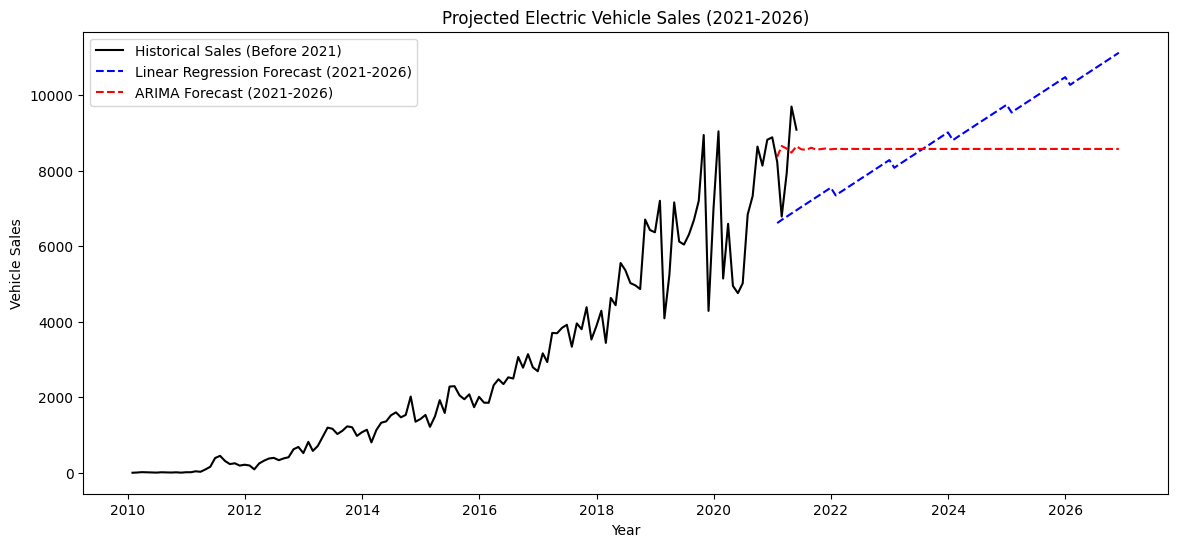

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(monthly_data['date'], monthly_data['vehicle_sales'], label="Historical Sales (Before 2021)", color='black')
plt.plot(future_periods, lr_predictions, label="Linear Regression Forecast (2021-2026)", linestyle='dashed', color='blue')
plt.plot(future_periods, arima_predictions, label="ARIMA Forecast (2021-2026)", linestyle='dashed', color='red')
plt.xlabel("Year")
plt.ylabel("Vehicle Sales")
plt.legend()
plt.title("Projected Electric Vehicle Sales (2021-2026)")
plt.show()